# Randomization analysis

Explain analysis.

## Setting up the notebook

In [1]:
import sys
import os
from numpy import arange
import pandas
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import RandomizeInteractionSet

In this notebook, we use the following classes and functions:
* ``DiachromaticInteractionSet``
    - ``parse_file``: Read interactions from file
    - ``get_read_file_info_report``: Get information about files that have already been read in form of a formatted string
    - ``write_diachromatic_interaction_fdr_test_file`` : Generate test file for FDR procedure
* ``RandomizeInteractionSet``
    - ``xxxx``: XXX

We use the ``DiachromaticInteractionSet`` to read interactions from a file. The FDR procedure is carried out in class ``RandomizeInteractionSet``, which operates on an already existing ``DiachromaticInteractionSet`` object that has been passed to its constructor.

## Test files

### Test file 1

We use the test file with ``64,000`` interactions, which we also use to test the FDR prcedure. 

In [2]:
ls ../tests/data/test_03/*top_64000*

../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz


## XXX

First, we read the interaction file into an interaction set.

In [3]:
interaction_set = DiachromaticInteractionSet()
interaction_set.parse_file('../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz', verbose=True)
read_file_info_report = interaction_set.get_read_file_info_report()
print(read_file_info_report)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
[INFO] ... done.
[INFO] Report on reading files:
	[INFO] Read interaction data from 1 files:
		[INFO] 64,000 interactions from: 
			[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
			[INFO] Set size: 64,000
	[INFO] The interaction set has 64,000 interactions.
[INFO] End of report.



Next, we create an object of class ``RandomizeInteractionSet`` and pass the interaction set to this object.

In [4]:
randomization_analysis = RandomizeInteractionSet(interaction_set=interaction_set)

Then we call the function ``perform_randomization_analysis`` of the class ``RandomizeInteractionSet`` in which the entire randomization analysis is implemented. To this function, a ``nominal_alpha`` is passed, which is used as the P-value threshold. Interactions that have a smaller P-value are counted as significant.

In [5]:
import time
start = time.time()
randomization_analysis_info_dict = randomization_analysis.perform_randomization_analysis(
    nominal_alpha = 0.05,
    iter_num = 10,
    thread_num=2
)
end = time.time()
print("\nRuntime: " + str(end-start))

[INFO] Number of significant interactions: 5170
[INFO] Batch: Performing 5 iterations ...
	[INFO] Iteration indices: [5, 6, 7, 8, 9]
[INFO] Batch: Performing 5 iterations ...
	[INFO] Iteration indices: [5, 6, 7, 8, 9]
[INFO] List randomized significant interaction numbers: [1702, 1730, 1688, 1742, 1730, 1702, 1730, 1688, 1742, 1730]
[INFO] Mean number of randomized significant interactions: 1718.4
[INFO] Standard deviation of randomized significant interactions: 20.095770699328753
[INFO] Z-score: 171.76

Runtime: 3.9826581478118896


In [6]:
pandas.DataFrame(randomization_analysis_info_dict['RESULTS']['SUMMARY'])

,SIG_NUM_O,SIG_NUM_R_MEAN,SIG_NUM_R_STD,Z_SCORE
0,5170,1775.4,35.808379,94.80


Text(3010.9, 900, 'Z-score: 171.76')

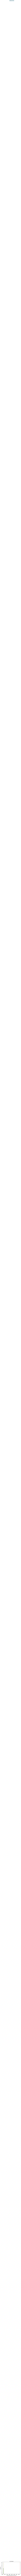

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = randomization_analysis_info_dict['RESULTS']['SIG_NUM_R_LIST']
sig_num_o = randomization_analysis_info_dict['RESULTS']['SUMMARY']['SIG_NUM_O'][0]
sig_num_r_mean = randomization_analysis_info_dict['RESULTS']['SUMMARY']['SIG_NUM_R_MEAN'][0]
z_score = float(randomization_analysis_info_dict['RESULTS']['SUMMARY']['Z_SCORE'][0])

n, bins, patches = plt.hist(x, 5, density=False, facecolor='g', alpha=0.75)
plt.xlim(min(x) - 200, sig_num_o + 200)

plt.title('OUT_PREFIX')
plt.xlabel('Randomized significant interactions')
plt.ylabel('Iterations')
plt.axvline(sig_num_r_mean, linestyle='--', color='red', linewidth=0.5)
plt.axvline(sig_num_o, linestyle='--', color='red', linewidth=0.5)


plt.text(sig_num_r_mean + sig_num_o/4, 900,'Z-score: ' + "{:.2f}".format(z_score), bbox={'color': 'lightblue', 'alpha': 0.5, 'pad': 4})

